In [66]:
import numpy as np
import pandas as pd

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
import os

In [5]:
DATA_FOLDER = '../Data'
FILE_NAME = 'StudentsPerformance.csv'
DATA_PATH = os.path.join(DATA_FOLDER, FILE_NAME)

In [69]:
df = pd.read_csv(DATA_PATH)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
df.shape

(1000, 8)

#### Checking Missing Values

In [72]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Checking Duplicate Values

In [73]:
df.duplicated().sum()

0

#### Lets see the Descriptive Statistics of the data

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Creating columns for "total Score" and "average score"

In [75]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = round(df['total score'] / 3.00, 3)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333
6,female,group B,some college,standard,completed,88,95,92,275,91.667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333


#### lets check the unique values for the categorical columns

In [76]:
cat_cols = df.select_dtypes(include="object").columns.to_list()

for cat in cat_cols:
    print(df[cat].value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64



In [78]:
full_marks_math = df[df['math score'] == 100]['math score'].count()
full_marks_reading = df[df['reading score'] == 100]['reading score'].count()
full_marks_writing = df[df['writing score'] == 100]['writing score'].count()

print(f"There are {full_marks_math} students in Maths, {full_marks_reading} students in reading, and " +
      f"{full_marks_writing} students in writing got full marks")

There are 7 students in Maths, 17 students in reading, and 14 students in writing got full marks


In [79]:
fail_math = df[df['math score'] < 30]['math score'].count()
fail_reading = df[df['reading score'] < 30]['reading score'].count()
fail_writing = df[df['writing score'] < 30]['writing score'].count()

print(f"There are {fail_math} students in Maths, {fail_reading} students in reading, and " +
      f"{fail_writing} students in writing failed in the exams")

There are 14 students in Maths, 8 students in reading, and 9 students in writing failed in the exams


##### More students in maths failed in the exams

In [92]:
#Plotting functions

def dist_plot(X, columns, plot="histplot", label=None):
    plt.figure(figsize=(18,10))

    for idx, col in enumerate(columns):
        plt.subplot(4, 3, idx + 1)

        if plot == "histplot":
            g = sns.histplot(x=col, data=X, kde=True, hue=label)

        if plot == "boxplot":
            g = sns.boxplot(x=col, data=X, hue=label)

    plt.tight_layout()


def count_plot(X, columns, plot="countplot"):
    plt.figure(figsize=(18,10))

    for idx, col in enumerate(columns):
        plt.subplot(4, 3, idx + 1)

        if plot == "countplot":
            g = sns.countplot(x=col, data=X)

    plt.tight_layout()

#### Can we check the distribution for ther numeric columns
#### Point noted that we are considering only the total score & average score

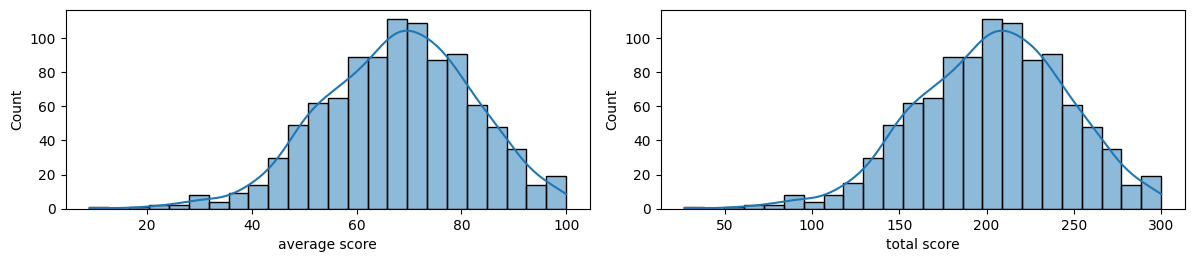

In [84]:
num_cols = ['average score', 'total score']
dist_plot(df, num_cols)

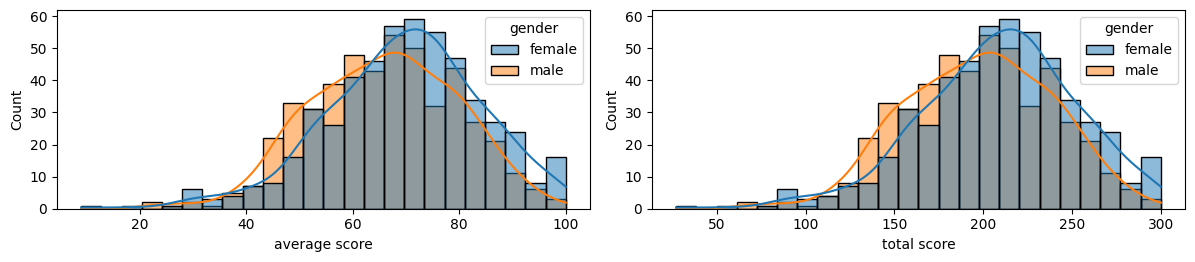

In [86]:
dist_plot(df, num_cols, label='gender')

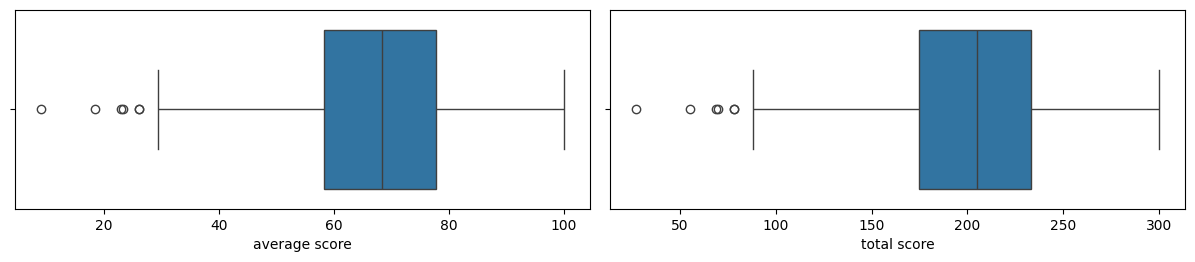

In [85]:
dist_plot(df, num_cols, plot="boxplot")

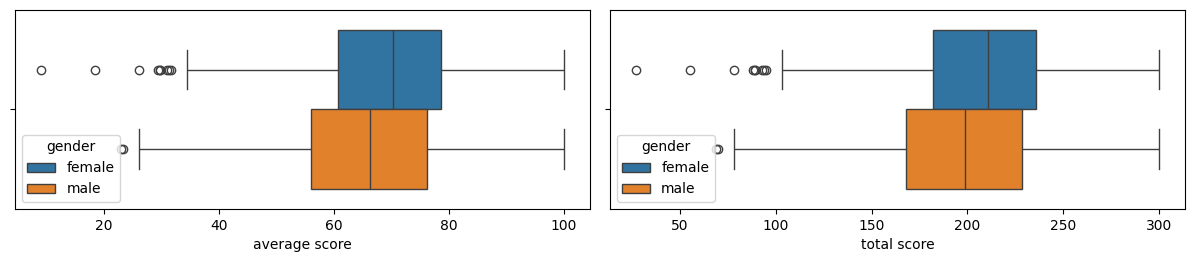

In [91]:
dist_plot(df, num_cols, plot="boxplot", label='gender')

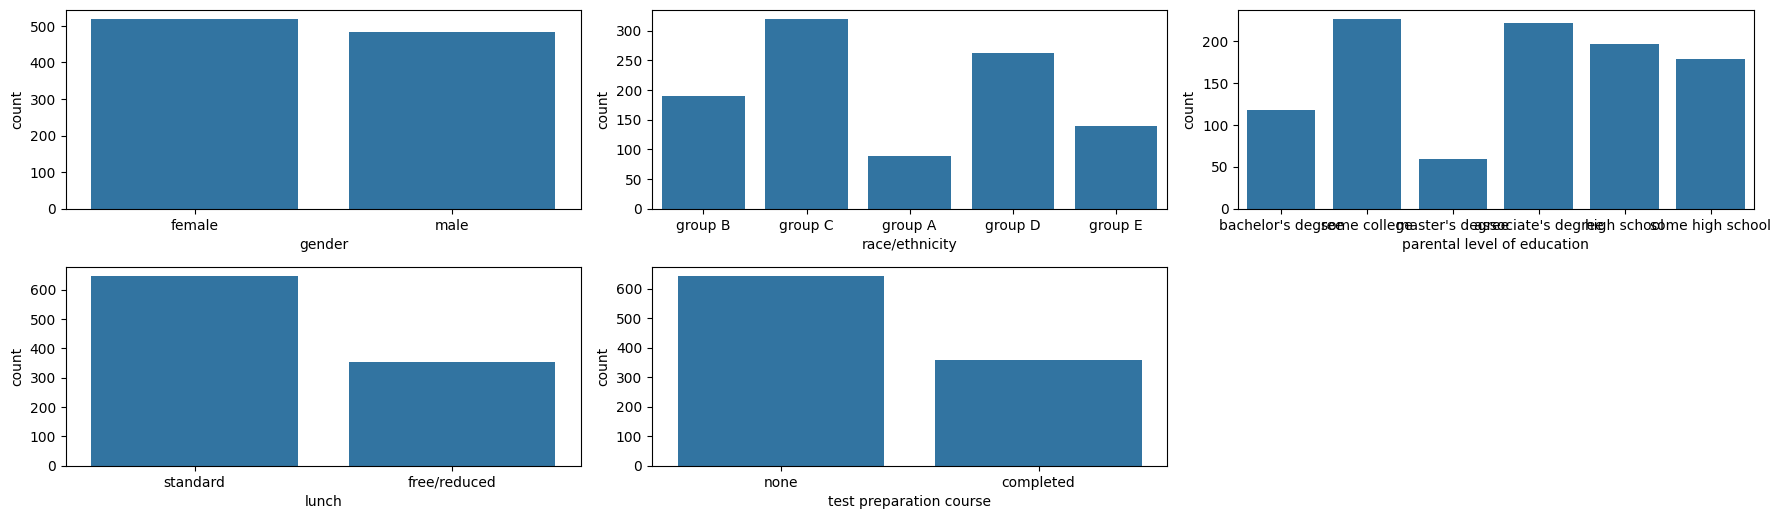

In [63]:
count_plot(df, cat_cols)

In [95]:
df_reduced = df.drop(columns=['math score', 'reading score', 'writing score'], axis=1)
df_reduced

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score,average score
0,female,group B,bachelor's degree,standard,none,218,72.667
1,female,group C,some college,standard,completed,247,82.333
2,female,group B,master's degree,standard,none,278,92.667
3,male,group A,associate's degree,free/reduced,none,148,49.333
4,male,group C,some college,standard,none,229,76.333
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,282,94.000
996,male,group C,high school,free/reduced,none,172,57.333
997,female,group C,high school,free/reduced,completed,195,65.000
998,female,group D,some college,standard,completed,223,74.333


In [99]:
df_reduced.to_csv("trans_df.csv", index=False)